In [4]:
import pandas as pd
from requests import get
from bs4 import BeautifulSoup
import os
import json
from os import path
import re
import acquire
import env

import unicodedata
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib default plotting styles
plt.rc("patch", edgecolor="black", force_edgecolor=True)
plt.rc("axes", grid=True)
plt.rc("grid", linestyle=":", linewidth=0.8, alpha=0.7)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(11, 8))
plt.rc("font", size=12.0)
plt.rc("hist", bins=25)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# def get_links():
#     for url in urls:
        
#         headers = {'User-Agent': 'Codeup Data Science Student'}
#         response = get(url, headers=headers)
#         soup = BeautifulSoup(response.content, 'html.parser')
    
#     urls = []
    
#     for h1 in soup.find_all('h1'):
#         urls.append((re.sub(r'\s', '',h1.text)))
#     urls.pop(0)
#     return urls

In [8]:
def create_urls(string):
    urls = []
    for item in string:
        base_url = 'https://github.com/{}'.format(item)
        urls.append(base_url)
    return urls

In [9]:
repo_url_end = ['AIDungeon/AIDungeon',
             'rclone/rclone',
             'marblexu/PythonPlantsVsZombies',
             'redox-os/orbtk',
             'sailay1996/UAC_Bypass_In_The_Wild',
             'ruanyf/weekly',
             'alirezadir/Production-Level-Deep-Learning',
             'sdmg15/Best-websites-a-programmer-should-visit',
             'practicalAI/practicalAI',
             'HuaweiJoke/Huawei-Joke',
             'trekhleb/javascript-algorithms',
             '521xueweihan/HelloGitHub',
             'getify/You-Dont-Know-JS',
             'kdn251/interviews',
             'eavichay/microfronts',
             'goldbergyoni/nodebestpractices',
             'wuyouzhuguli/SpringAll',
             'halo-dev/halo',
             'serverless/serverless',
             'prometheus/client_golang',
             'VMadalin/kotlin-sample-app',
             'davidfowl/FeatherHttp',
             '0vercl0k/CVE-2019-11708',
             'mrdoob/three.js',
             'OfficeDev/office-ui-fabric-react',
             'standard/standard',
             'eslint/eslint',
             'jshint/jshint',
             'clutchski/coffeelint',
             'csscomb/csscomb.js',
             'sds/scss-lint',
             'htmlhint/HTMLHint',
             'validator/validator',
             'CSSLint/csslint',
             'PyCQA/pycodestyle',
             'PyCQA/flake8',
             'psf/black',
             'checkstyle/checkstyle',
             'rubocop-hq/rubocop',
             'oclint/oclint',
             'golang/lint',
             'ndmitchell/hlint',
             'coala/coala',
             'pre-commit/pre-commit',
             'innogames/igcommit',
             'fivethirtyeight/data',
             'datadesk/notebooks',
             'nytimes/objective-c-style-guide',
             'newsapps/beeswithmachineguns',
             'voxmedia/meme',
             'propublica/guides',
             'censusreporter/censusreporter',
             'nprapps/app-template',
             'TimeMagazineLabs/babynames',
             'guardian/frontend',
             'dukechronicle/chronline',
             'BloombergMedia/whatiscode',
             'times/cardkit',
             'mkiser/WTFJHT',
             'twbs/bootstrap',
             'daneden/animate.css',
             'nathansmith/960-Grid-System',
             'necolas/normalize.css',
             'ionic-team/ionicons',
             'designmodo/Flat-UI',
             'h5bp/html5-boilerplate',
             'foundation/foundation-sites',
             'Modernizr/Modernizr',
             'twbs/ratchet',
             'IanLunn/Hover',
             'connors/photon',
             'basscss/basscss',
             'atlemo/SubtlePatterns',
             'mrmrs/colors',
             'beetbox/beets',
             'scottschiller/SoundManager2',
             'CreateJS/SoundJS',
             'musescore/MuseScore',
             'tomahawk-player/tomahawk',
             'cashmusic/platform',
             'mopidy/mopidy',
             'AudioKit/AudioKit',
             'Soundnode/soundnode-app',
             'gillesdemey/Cumulus',
             'metabrainz/picard',
             'overtone/overtone',
             'samaaron/sonic-pi',
             'puppetlabs/puppet',
             'chef/chef',
             'ansible/ansible',
             'saltstack/salt',
             'hashicorp/vagrant',
             'openstack/openstack',
             'moby/moby',
             'capistrano/capistrano',
             'statsd/statsd',
             'graphite-project/graphite-web',
             'elastic/logstash',
             'fabric/fabric',
             'grafana/grafana',
             'StackStorm/st2',
             'openshift/origin',
             'getsentry/sentry',
             'deployphp/deployer',
             'kubernetes/kubernetes',
             'netdata/netdata',
             'cloud66-oss/habitus'
             
]

In [11]:
repo_list = create_urls(string=repo_url_end)

In [12]:
repo_list

['https://github.com/AIDungeon/AIDungeon',
 'https://github.com/rclone/rclone',
 'https://github.com/marblexu/PythonPlantsVsZombies',
 'https://github.com/redox-os/orbtk',
 'https://github.com/sailay1996/UAC_Bypass_In_The_Wild',
 'https://github.com/ruanyf/weekly',
 'https://github.com/alirezadir/Production-Level-Deep-Learning',
 'https://github.com/sdmg15/Best-websites-a-programmer-should-visit',
 'https://github.com/practicalAI/practicalAI',
 'https://github.com/HuaweiJoke/Huawei-Joke',
 'https://github.com/trekhleb/javascript-algorithms',
 'https://github.com/521xueweihan/HelloGitHub',
 'https://github.com/getify/You-Dont-Know-JS',
 'https://github.com/kdn251/interviews',
 'https://github.com/eavichay/microfronts',
 'https://github.com/goldbergyoni/nodebestpractices',
 'https://github.com/wuyouzhuguli/SpringAll',
 'https://github.com/halo-dev/halo',
 'https://github.com/serverless/serverless',
 'https://github.com/prometheus/client_golang',
 'https://github.com/VMadalin/kotlin-sampl

In [ ]:
# def get_dataframe():

#     output = []
    
#     urls = create_urls()
    
#     for url in urls:
#         headers = {'User-Agent': 'Codeup Data Science Student'}
#         response = get(url, headers=headers)
#         soup = BeautifulSoup(response.content, 'html.parser')
#         title = urls[url]
#         language = soup.find('span', class_= 'lang').text
#         body = soup.find('div', class_= 'Box-body').text

#         data = {
#             'title' : title,
#             'language' : language,
#             'body' : body
#         }

#         output.append(data)
# #     df = pd.DataFrame(output, header=None)
#     return output

In [27]:
# def get_links():
# #     url = 'https://github.com/trending'
# #     url = 'https://github.com/collections/clean-code-linters'
# #     url = 'https://github.com/collections/open-journalism'
# #     url = 'https://github.com/collections/design-essentials'
# #     url = 'https://github.com/collections/music'
#     url = 'https://github.com/collections/devops-tools'
#     headers = {'User-Agent': 'Codeup Data Science Student'}
#     response = get(url, headers=headers)
#     soup = BeautifulSoup(response.content, 'html.parser')
    
#     urls = []
    
#     for h1 in soup.find_all('h1'):
#         urls.append((re.sub(r'\s', '',h1.text)))
#     urls.pop(0)
#     return urls

In [13]:
x = []
for url in repo_url_end:
    x.extend(url.split('/'))

In [14]:
x

['AIDungeon',
 'AIDungeon',
 'rclone',
 'rclone',
 'marblexu',
 'PythonPlantsVsZombies',
 'redox-os',
 'orbtk',
 'sailay1996',
 'UAC_Bypass_In_The_Wild',
 'ruanyf',
 'weekly',
 'alirezadir',
 'Production-Level-Deep-Learning',
 'sdmg15',
 'Best-websites-a-programmer-should-visit',
 'practicalAI',
 'practicalAI',
 'HuaweiJoke',
 'Huawei-Joke',
 'trekhleb',
 'javascript-algorithms',
 '521xueweihan',
 'HelloGitHub',
 'getify',
 'You-Dont-Know-JS',
 'kdn251',
 'interviews',
 'eavichay',
 'microfronts',
 'goldbergyoni',
 'nodebestpractices',
 'wuyouzhuguli',
 'SpringAll',
 'halo-dev',
 'halo',
 'serverless',
 'serverless',
 'prometheus',
 'client_golang',
 'VMadalin',
 'kotlin-sample-app',
 'davidfowl',
 'FeatherHttp',
 '0vercl0k',
 'CVE-2019-11708',
 'mrdoob',
 'three.js',
 'OfficeDev',
 'office-ui-fabric-react',
 'standard',
 'standard',
 'eslint',
 'eslint',
 'jshint',
 'jshint',
 'clutchski',
 'coffeelint',
 'csscomb',
 'csscomb.js',
 'sds',
 'scss-lint',
 'htmlhint',
 'HTMLHint',
 'vali

In [16]:
# acquire.scrape_github_data()

In [17]:
original_df = pd.read_json('data.json')

In [18]:
original_df.shape

(107, 3)

In [19]:
original_df.describe()

,language,readme_contents,repo
count,100,107,107
unique,18,107,107
top,JavaScript,See https://data.fivethirtyeight.com/ for a li...,openshift/origin
freq,25,1,1


In [20]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
language           100 non-null object
readme_contents    107 non-null object
repo               107 non-null object
dtypes: object(3)
memory usage: 2.6+ KB


In [21]:
original_df = original_df.dropna()

In [22]:
original_df.shape

(100, 3)

In [23]:
original_df = original_df.reset_index()

In [24]:
original_df = original_df.drop(columns='index')

In [25]:
original_df.head()

,language,readme_contents,repo
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...,AIDungeon/AIDungeon
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh...",rclone/rclone
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...,marblexu/PythonPlantsVsZombies
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl...",redox-os/orbtk
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...,sailay1996/UAC_Bypass_In_The_Wild


In [26]:
df = original_df[['language', 'readme_contents']]

In [27]:
df.head()

,language,readme_contents
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh..."
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl..."
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...


In [28]:
def normalize(string):
    """
    Convert to all lowercase  
    Normalize the unicode chars  
    Remove any non-alpha or whitespace characters  
    Remove any alpha strings with 2 characters or less  
    """
    string = string.lower()
    string = unicodedata.normalize('NFKD', string).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # keep only alpha chars
    string = re.sub(r'[^a-z]', ' ', string)
    
    # remove strings less than 2 chars in length
    string = re.sub(r'\b[a-z]{,2}\b', '', string)
    
    # convert newlines and tabs to a single space
    string = re.sub(r'[\r|\n|\r\n]+', ' ', string)
    
    # strip extra whitespace
    string = string.strip()
    
    return string

df = df.assign(normalized = df.readme_contents.apply(normalize))

In [29]:
df.head()

,language,readme_contents,normalized
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...,aidungeon the model for dungeon tempo...
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh...",img src https rclone org img logo light h...
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...,pythonplantsvszombies simple plantsvszombies ...
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl...",img alt orbtk width src https gitla...
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...,uac bypass the wild windows uac bypass for...


In [30]:
def stem(string):
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in string.split()]
    string_of_stems = ' '.join(stems)
    return string_of_stems

In [31]:
def lemmatize(string):
    wnl = nltk.stem.WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    string_of_lemmas = ' '.join(lemmas)
    return string_of_lemmas

In [32]:
def tokenize(string):
    tokenizer = nltk.tokenize.ToktokTokenizer()
    return tokenizer.tokenize(string, return_str=True)

In [33]:
def remove_stopwords(tokenized_string, extra_words=['https', 'http', 'github', 'www', 'email','gmail', 'com', 'AIDungeon',
 'AIDungeon',
 'rclone',
 'rclone',
 'marblexu',
 'PythonPlantsVsZombies',
 'redox-os',
 'orbtk',
 'sailay1996',
 'UAC_Bypass_In_The_Wild',
 'ruanyf',
 'weekly',
 'alirezadir',
 'Production-Level-Deep-Learning',
 'sdmg15',
 'Best-websites-a-programmer-should-visit',
 'practicalAI',
 'practicalAI',
 'HuaweiJoke',
 'Huawei-Joke',
 'trekhleb',
 'javascript-algorithms',
 '521xueweihan',
 'HelloGitHub',
 'getify',
 'You-Dont-Know-JS',
 'kdn251',
 'interviews',
 'eavichay',
 'microfronts',
 'goldbergyoni',
 'nodebestpractices',
 'wuyouzhuguli',
 'SpringAll',
 'halo-dev',
 'halo',
 'serverless',
 'serverless',
 'prometheus',
 'client_golang',
 'VMadalin',
 'kotlin-sample-app',
 'davidfowl',
 'FeatherHttp',
 '0vercl0k',
 'CVE-2019-11708',
 'mrdoob',
 'three.js',
 'OfficeDev',
 'office-ui-fabric-react',
 'standard',
 'standard',
 'eslint',
 'eslint',
 'jshint',
 'jshint',
 'clutchski',
 'coffeelint',
 'csscomb',
 'csscomb.js',
 'sds',
 'scss-lint',
 'htmlhint',
 'HTMLHint',
 'validator',
 'validator',
 'CSSLint',
 'csslint',
 'PyCQA',
 'pycodestyle',
 'PyCQA',
 'flake8',
 'psf',
 'black',
 'checkstyle',
 'checkstyle',
 'rubocop-hq',
 'rubocop',
 'oclint',
 'oclint',
 'golang',
 'lint',
 'ndmitchell',
 'hlint',
 'coala',
 'coala',
 'pre-commit',
 'pre-commit',
 'innogames',
 'igcommit',
 'fivethirtyeight',
 'data',
 'datadesk',
 'notebooks',
 'nytimes',
 'objective-c-style-guide',
 'newsapps',
 'beeswithmachineguns',
 'voxmedia',
 'meme',
 'propublica',
 'guides',
 'censusreporter',
 'censusreporter',
 'nprapps',
 'app-template',
 'TimeMagazineLabs',
 'babynames',
 'guardian',
 'frontend',
 'dukechronicle',
 'chronline',
 'BloombergMedia',
 'whatiscode',
 'times',
 'cardkit',
 'mkiser',
 'WTFJHT',
 'twbs',
 'bootstrap',
 'daneden',
 'animate.css',
 'nathansmith',
 '960-Grid-System',
 'necolas',
 'normalize.css',
 'ionic-team',
 'ionicons',
 'designmodo',
 'Flat-UI',
 'h5bp',
 'html5-boilerplate',
 'foundation',
 'foundation-sites',
 'Modernizr',
 'Modernizr',
 'twbs',
 'ratchet',
 'IanLunn',
 'Hover',
 'connors',
 'photon',
 'basscss',
 'basscss',
 'atlemo',
 'SubtlePatterns',
 'mrmrs',
 'colors',
 'beetbox',
 'beets',
 'scottschiller',
 'SoundManager2',
 'CreateJS',
 'SoundJS',
 'musescore',
 'MuseScore',
 'tomahawk-player',
 'tomahawk',
 'cashmusic',
 'platform',
 'mopidy',
 'mopidy',
 'AudioKit',
 'AudioKit',
 'Soundnode',
 'soundnode-app',
 'gillesdemey',
 'Cumulus',
 'metabrainz',
 'picard',
 'overtone',
 'overtone',
 'samaaron',
 'sonic-pi',
 'puppetlabs',
 'puppet',
 'chef',
 'chef',
 'ansible',
 'ansible',
 'saltstack',
 'salt',
 'hashicorp',
 'vagrant',
 'openstack',
 'openstack',
 'moby',
 'moby',
 'capistrano',
 'capistrano',
 'statsd',
 'statsd',
 'graphite-project',
 'graphite-web',
 'elastic',
 'logstash',
 'fabric',
 'fabric',
 'grafana',
 'grafana',
 'StackStorm',
 'st2',
 'openshift',
 'origin',
 'getsentry',
 'sentry',
 'deployphp',
 'deployer',
 'kubernetes',
 'kubernetes',
 'netdata',
 'netdata',
 'cloud66-oss',
 'habitus'], exclude_words=[]):
    words = tokenized_string.split()
    stopword_list = stopwords.words('english')

    # remove the excluded words from the stopword list
    stopword_list = set(stopword_list) - set(exclude_words)

    # add in the user specified extra words
    stopword_list = stopword_list.union(set(extra_words))

    filtered_words = [w for w in words if w not in stopword_list]
    final_string = " ".join(filtered_words)
    return final_string

In [34]:
df = df.assign(original = df.readme_contents)

df = df.assign(normalized = df.original.apply(normalize))

df = df.assign(stemmed = df.normalized.apply(stem))
df = df.assign(lemmatized = df.normalized.apply(lemmatize))

df = df.assign(cleaned = df.lemmatized.apply(remove_stopwords))
df.head()

,language,readme_contents,normalized,original,stemmed,lemmatized,cleaned
0,Python,# AIDungeon2\n\n### The model for AI Dungeon2 ...,aidungeon the model for dungeon tempo...,# AIDungeon2\n\n### The model for AI Dungeon2 ...,aidungeon the model for dungeon temporarili un...,aidungeon the model for dungeon temporarily un...,aidungeon model dungeon temporarily unavailabl...
1,Go,"[<img src=""https://rclone.org/img/logo_on_ligh...",img src https rclone org img logo light h...,"[<img src=""https://rclone.org/img/logo_on_ligh...",img src http rclone org img logo light horizon...,img src http rclone org img logo light horizon...,img src org img logo light horizontal color sv...
2,Python,# PythonPlantsVsZombies\na simple PlantsVsZomb...,pythonplantsvszombies simple plantsvszombies ...,# PythonPlantsVsZombies\na simple PlantsVsZomb...,pythonplantsvszombi simpl plantsvszombi game i...,pythonplantsvszombies simple plantsvszombies g...,pythonplantsvszombies simple plantsvszombies g...
3,Rust,"<img alt=""OrbTk"" width=""380"" src=""https://gitl...",img alt orbtk width src https gitla...,"<img alt=""OrbTk"" width=""380"" src=""https://gitl...",img alt orbtk width src http gitlab redox org ...,img alt orbtk width src http gitlab redox org ...,img alt width src gitlab redox org redox asset...
4,C,# UAC Bypass In The Wild\nWindows 10 UAC bypas...,uac bypass the wild windows uac bypass for...,# UAC Bypass In The Wild\nWindows 10 UAC bypas...,uac bypass the wild window uac bypass for all ...,uac bypass the wild window uac bypass for all ...,uac bypass wild window uac bypass executable f...


In [35]:
df.tail()

,language,readme_contents,normalized,original,stemmed,lemmatized,cleaned
95,Python,".. raw:: html\n\n <p align=""center"">\n <...",raw html align center align ...,".. raw:: html\n\n <p align=""center"">\n <...",raw html align center align center href http s...,raw html align center align center href http s...,raw html align center align center href utm so...
96,PHP,"# Deployer\n\n<a href=""https://travis-ci.org/d...",deployer href https travis org deployph...,"# Deployer\n\n<a href=""https://travis-ci.org/d...",deploy href http travi org deployphp deploy im...,deployer href http travis org deployphp deploy...,href travis org img src travis org svg branch ...
97,Go,# Kubernetes\n\n[![GoDoc Widget]][GoDoc] [![CI...,kubernetes godoc widget godoc cii be...,# Kubernetes\n\n[![GoDoc Widget]][GoDoc] [![CI...,kubernet godoc widget godoc cii best practic h...,kubernetes godoc widget godoc cii best practic...,godoc widget godoc cii best practice bestpract...
98,C,# Netdata [![Build Status](https://travis-ci.c...,netdata build status https travis com n...,# Netdata [![Build Status](https://travis-ci.c...,netdata build statu http travi com netdata net...,netdata build status http travis com netdata n...,build status travis svg branch master travis c...
99,Go,"<img src=""http://cdn2-cloud66-com.s3.amazonaws...",img src http cdn cloud com amazonaws c...,"<img src=""http://cdn2-cloud66-com.s3.amazonaws...",img src http cdn cloud com amazonaw com imag o...,img src http cdn cloud com amazonaws com image...,img src cdn cloud amazonaws image os sponsorsh...


In [36]:
def prep_articles(df):
    df = df.assign(original = df.readme_contents)
    df = df.assign(normalized = df.original.apply(normalize))
    df = df.assign(stemmed = df.normalized.apply(stem))
    df = df.assign(lemmatized = df.normalized.apply(lemmatize))
    df = df.assign(cleaned = df.lemmatized.apply(remove_stopwords))
    df.drop(columns=["title"], inplace=True)
    return df

In [37]:
raw_count = pd.Series(" ".join(df.cleaned).split()).value_counts()

In [38]:
raw_count

org                  634
img                  558
file                 514
src                  489
svg                  470
html                 394
code                 384
use                  364
doc                  354
href                 324
master               316
project              315
license              301
cs                   292
plugin               275
badge                274
build                269
using                254
run                  249
install              230
line                 230
png                  217
image                211
python               208
release              205
version              204
example              197
opencollective       197
test                 196
new                  196
                    ... 
zheng                  1
espanol                1
crockford              1
recognizes             1
xhaskell               1
exclusive              1
longestpalindrome      1
slate                  1
posicionamento         1


Text(0.5, 1.0, '10 most common words')

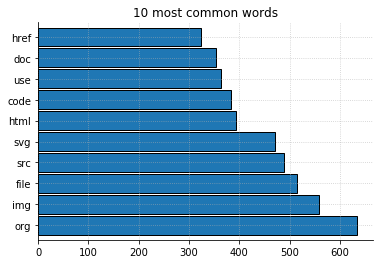

In [39]:
raw_count.sort_values(ascending=False)[0:10].plot.barh(width=.9)
plt.title('10 most common words')

In [40]:
df.cleaned[0]

'aidungeon model dungeon temporarily unavailable download due cost working solution read aidungeon wa built pcc byu edu dungeon creating infinitely generated text adventure deep learning language model play game colab aidungeon play game locally recommended nvidia gpu memory cuda installed gpu turn take couple minute game compose response install play locally git clone aidungeon aidungeon aidungeon install python play community aidungeon open source project question discussion contribution welcome contribution anything new package bugfixes documentation even new core feature resource website aidungeon aidungeon aidungeon twitter creator nickwalton twitter nickwalton dev benjbay twitter benjbay reddit aidungeon reddit aidungeon discord aidungeon discord discord vcz contributing contributing aidungeon relatively easy send pull request help article using pull request fork send request make develop destination branch aidungeon repository nickwalton aidungeon prefer pr pep python org dev pe

In [41]:
def idf(word):
    n_occurrences = sum([1 for doc in df.cleaned if word in doc])
    n_docs = len(df.cleaned)
    idf = np.log(n_docs/n_occurrences)
    return idf

In [42]:
part1 = ' '.join(df.cleaned)
part2 = part1.split()
part3 = pd.Series(part2)
# print(part3.value_counts())

part4 = part3.unique()
type(part4)
# confirm that those words that existed multiple times, are now only represented once in the unique_words list. 
# print(pd.Series(part4).value_counts())

numpy.ndarray

In [43]:
part4

array(['aidungeon', 'model', 'dungeon', ..., 'healthy', 'downstream',
       'schema'], dtype=object)

In [44]:
unique_words = pd.Series(' '.join(df.cleaned).split()).unique()

In [45]:
word_df = pd.DataFrame(dict(word = unique_words))
word_df.head()

word_df = word_df.assign(idf = lambda df: df.word.apply(idf))

word_df.set_index('word').sort_values(by='idf', ascending = False).head(5)

,idf
word,
aidungeon,4.60517
prerelease,4.60517
rollout,4.60517
zoomin,4.60517
diligently,4.60517


In [46]:
# put in a dataframe
idf_df = pd.DataFrame(dict(word = unique_words))\
    .assign(idf = lambda df: df.word.apply(idf))\
    .set_index('word').sort_values(by='idf', ascending = False)

idf_df.head(5)

,idf
word,
aidungeon,4.60517
prerelease,4.60517
rollout,4.60517
zoomin,4.60517
diligently,4.60517


In [47]:
documents = df.cleaned.to_dict()

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(documents.values())

In [49]:
features_df = pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())
features_df.head()

,aaa,aaaaaa,aac,aacecc,aaf,aaojmfs,aardvark,aaron,ab,aba,...,zram,zrzmjddxrve,zsol,zsolt,zulip,zulipchat,zurb,zuul,zvrw,zxuypkodwof
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling

In [50]:
df.language.value_counts()[df.language.value_counts() == 1].index]

SyntaxError: invalid syntax (<ipython-input-50-fdfdf21d03a7>, line 1)

In [ ]:
df.language.value_counts()[df.language.value_counts() == 1].index

In [ ]:
list(df.language.value_counts()[df.language.value_counts() == 1].index)

In [56]:
df[df.language == 'Kotlin']
df = df.drop(15)
df[df.language == 'C#']
df = df.drop(16)
df[df.language == 'CoffeeScript']
df = df.drop(23)
df[df.language == 'Clojure']
df = df.drop(78)
df[df.language == 'Haskell']
df = df.drop(36)
df[df.language == 'Rust']
df = df.drop(3)

In [57]:
df = df.reset_index()

### Logistic Regression

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# df = pd.read_csv('./data/spam_clean.csv')
# df.head()

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.cleaned)
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [59]:
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
# print(classification_report(train.actual, train.predicted))

---
Confusion Matrix
actual      C  C++  CSS  Go  HTML  Java  JavaScript  Jupyter Notebook  PHP  \
predicted                                                                    
CSS         0    0    7   0     0     0           0                 0    0   
JavaScript  2    3    0   5     4     4          20                 2    2   
Python      0    0    0   0     0     0           0                 0    0   
Ruby        0    0    0   0     0     0           0                 0    0   

actual      Python  Ruby  TypeScript  
predicted                             
CSS              0     0           0  
JavaScript       0     3           3  
Python          16     0           0  
Ruby             0     4           0  
---


In [60]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---') 
print(classification_report(test.actual, test.predicted))

Accuracy: 42.11%
---
Confusion Matrix
actual      C++  CSS  Go  HTML  Java  JavaScript  Python  Ruby  TypeScript
predicted                                                                 
JavaScript    1    2   2     1     1           5       1     2           1
Python        0    0   0     0     0           0       3     0           0
---
              precision    recall  f1-score   support

         C++       0.00      0.00      0.00         1
         CSS       0.00      0.00      0.00         2
          Go       0.00      0.00      0.00         2
        HTML       0.00      0.00      0.00         1
        Java       0.00      0.00      0.00         1
  JavaScript       0.31      1.00      0.48         5
      Python       1.00      0.75      0.86         4
        Ruby       0.00      0.00      0.00         2
  TypeScript       0.00      0.00      0.00         1

    accuracy                           0.42        19
   macro avg       0.15      0.19      0.15        19
weighted

### 

### Decision Tree

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [62]:
print(clf.feature_importances_)

[0. 0. 0. ... 0. 0. 0.]


In [63]:
y_pred = clf.predict(X_train)
y_pred

array(['JavaScript', 'JavaScript', 'Python', 'Go', 'Python', 'JavaScript',
       'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript',
       'JavaScript', 'JavaScript', 'JavaScript', 'Python', 'JavaScript',
       'Go', 'JavaScript', 'JavaScript', 'C', 'Python', 'JavaScript',
       'Go', 'Python', 'Go', 'JavaScript', 'Python', 'JavaScript',
       'JavaScript', 'Python', 'CSS', 'JavaScript', 'JavaScript', 'Go',
       'Go', 'JavaScript', 'Go', 'JavaScript', 'Go', 'JavaScript',
       'JavaScript', 'JavaScript', 'Python', 'JavaScript', 'JavaScript',
       'JavaScript', 'Python', 'Go', 'CSS', 'JavaScript', 'Go',
       'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'Python',
       'JavaScript', 'CSS', 'JavaScript', 'CSS', 'Python', 'JavaScript',
       'Python', 'Go', 'JavaScript', 'JavaScript', 'JavaScript', 'C',
       'JavaScript', 'JavaScript', 'Go', 'JavaScript', 'CSS',
       'JavaScript', 'JavaScript', 'JavaScript'], dtype=object)

In [64]:
y_pred_proba = clf.predict_proba(X_train)
# y_pred_proba

In [65]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.57


In [66]:
confusion_matrix(y_train, y_pred)

array([[ 1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  4,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0]])

### Random Forest

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [68]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=10,
                            n_estimators=100,
                            max_depth=4, 
                            random_state=123)

In [69]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [70]:
print(rf.feature_importances_)

[0. 0. 0. ... 0. 0. 0.]


In [71]:
y_pred = rf.predict(X_train)

In [72]:
y_pred_proba = rf.predict_proba(X_train)

In [73]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.43


In [74]:
print(confusion_matrix(y_train, y_pred))

[[ 0  0  0  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  2  0  0]
 [ 0  0  0  0  0  0  3  0  0  1  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0 12  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0]]


In [75]:
print(classification_report(y_train, y_pred))

                  precision    recall  f1-score   support

               C       0.00      0.00      0.00         2
             C++       0.00      0.00      0.00         3
             CSS       0.00      0.00      0.00         7
              Go       0.00      0.00      0.00         5
            HTML       0.00      0.00      0.00         4
            Java       0.00      0.00      0.00         4
      JavaScript       0.34      1.00      0.51        20
Jupyter Notebook       0.00      0.00      0.00         2
             PHP       0.00      0.00      0.00         2
          Python       0.71      0.75      0.73        16
            Ruby       0.00      0.00      0.00         7
      TypeScript       0.00      0.00      0.00         3

        accuracy                           0.43        75
       macro avg       0.09      0.15      0.10        75
    weighted avg       0.24      0.43      0.29        75



In [76]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.32


### K-Nearest_Neighbor

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [78]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
y_pred = knn.predict(X_train)

In [81]:
y_pred_proba = knn.predict_proba(X_train)

In [82]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.61


In [83]:
print(confusion_matrix(y_train, y_pred))

[[ 1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  2  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  2  0  0  1  0  0  0  1  0]
 [ 0  0  0  1  0  0  3  0  0  0  0  0]
 [ 0  0  1  0  0  1  2  0  0  0  0  0]
 [ 0  0  0  1  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  1  2  0  0 11  1  0]
 [ 0  0  1  1  0  0  2  0  0  0  3  0]
 [ 1  0  1  0  0  0  1  0  0  0  0  0]]


In [84]:
print(classification_report(y_train, y_pred))

                  precision    recall  f1-score   support

               C       0.50      0.50      0.50         2
             C++       0.50      0.67      0.57         3
             CSS       0.70      1.00      0.82         7
              Go       0.33      0.40      0.36         5
            HTML       0.00      0.00      0.00         4
            Java       0.50      0.25      0.33         4
      JavaScript       0.58      0.95      0.72        20
Jupyter Notebook       0.00      0.00      0.00         2
             PHP       0.00      0.00      0.00         2
          Python       1.00      0.69      0.81        16
            Ruby       0.50      0.43      0.46         7
      TypeScript       0.00      0.00      0.00         3

        accuracy                           0.61        75
       macro avg       0.38      0.41      0.38        75
    weighted avg       0.56      0.61      0.56        75



In [85]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.58


([<matplotlib.axis.XTick at 0x1a2204c278>,
 <a list of 5 Text xticklabel objects>)

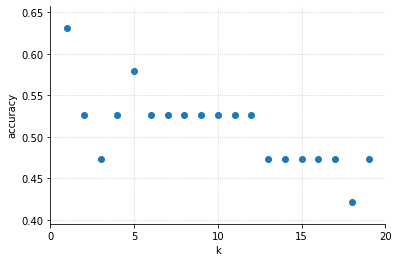

In [86]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

### Naive Bayes

In [89]:
import numpy as np
rng = np.random.RandomState(1)
X = X_train
y = y_train
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, y)

print(clf.predict(X))

['JavaScript' 'Python' 'Python' 'Python' 'Python' 'Python' 'Python'
 'Python' 'Python' 'Python' 'Python' 'Python' 'Python' 'Python'
 'JavaScript' 'Python' 'JavaScript' 'Python' 'C' 'Python' 'JavaScript'
 'Python' 'Python' 'Python' 'JavaScript' 'Python' 'Python' 'Python'
 'Python' 'Python' 'JavaScript' 'Python' 'Python' 'Python' 'JavaScript'
 'Python' 'JavaScript' 'Python' 'Python' 'Python' 'Python' 'Python'
 'Python' 'JavaScript' 'JavaScript' 'Python' 'Python' 'Python'
 'JavaScript' 'Python' 'Python' 'JavaScript' 'Jupyter Notebook' 'Python'
 'Python' 'Python' 'Python' 'Python' 'Python' 'Python' 'Python' 'Python'
 'Python' 'JavaScript' 'Python' 'Python' 'Python' 'Ruby' 'Python' 'Python'
 'Python' 'Python' 'Python' 'Python' 'Python']


In [90]:
y_pred = clf.predict(X)

In [91]:
y_pred_proba = clf.predict_proba(X_train)

In [92]:
print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Naive Bayes classifier on training set: 0.41


In [93]:
print(classification_report(y_train, y_pred))

                  precision    recall  f1-score   support

               C       1.00      0.50      0.67         2
             C++       0.00      0.00      0.00         3
             CSS       0.00      0.00      0.00         7
              Go       0.00      0.00      0.00         5
            HTML       0.00      0.00      0.00         4
            Java       0.00      0.00      0.00         4
      JavaScript       1.00      0.65      0.79        20
Jupyter Notebook       0.00      0.00      0.00         2
             PHP       0.00      0.00      0.00         2
          Python       0.27      1.00      0.43        16
            Ruby       1.00      0.14      0.25         7
      TypeScript       0.00      0.00      0.00         3

        accuracy                           0.41        75
       macro avg       0.27      0.19      0.18        75
    weighted avg       0.44      0.41      0.34        75



### Support Vector Machine (SVM)

In [110]:
import numpy as np
X = X_train
y = y_train
from sklearn.svm import SVC
clf = SVC(gamma='auto', kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
clf.predict(X)

array(['JavaScript', 'TypeScript', 'Python', 'C++', 'Python', 'C',
       'JavaScript', 'Ruby', 'CSS', 'Ruby', 'Ruby', 'TypeScript', 'Java',
       'Python', 'JavaScript', 'JavaScript', 'JavaScript', 'Python', 'C',
       'Python', 'JavaScript', 'JavaScript', 'Python', 'Go', 'JavaScript',
       'Python', 'JavaScript', 'JavaScript', 'Python', 'CSS',
       'JavaScript', 'JavaScript', 'Go', 'C++', 'JavaScript',
       'Jupyter Notebook', 'JavaScript', 'Ruby', 'Python',
       'Jupyter Notebook', 'HTML', 'Python', 'Python', 'JavaScript',
       'JavaScript', 'Python', 'PHP', 'CSS', 'JavaScript', 'Go', 'HTML',
       'JavaScript', 'JavaScript', 'Python', 'Python', 'CSS', 'CSS',
       'JavaScript', 'CSS', 'Python', 'Ruby', 'Python', 'Go',
       'JavaScript', 'JavaScript', 'HTML', 'Java', 'Ruby', 'JavaScript',
       'Go', 'Java', 'CSS', 'TypeScript', 'HTML', 'C++'], dtype=object)

In [121]:
print('Accuracy of Stochastic SVM on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Stochastic SVM on training set: 0.96


In [122]:
print('Accuracy of Stochastic SVM on training set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Stochastic SVM on training set: 0.42


### Stochastic Gradient Descent 

In [96]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
X = X_train
y = y_train
# clf = linear_model.SGDClassifier(max_iter=, tol=1e-3)
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [97]:
clf.predict(X)

array(['JavaScript', 'TypeScript', 'Python', 'C++', 'Python', 'C',
       'JavaScript', 'Ruby', 'CSS', 'Ruby', 'Ruby', 'TypeScript', 'Java',
       'Python', 'JavaScript', 'PHP', 'JavaScript', 'Python', 'C',
       'Python', 'JavaScript', 'Java', 'Python', 'Go', 'JavaScript',
       'Python', 'JavaScript', 'JavaScript', 'Python', 'CSS',
       'JavaScript', 'JavaScript', 'Go', 'C++', 'JavaScript',
       'Jupyter Notebook', 'JavaScript', 'Ruby', 'Python',
       'Jupyter Notebook', 'HTML', 'Python', 'Python', 'JavaScript',
       'JavaScript', 'Python', 'PHP', 'CSS', 'JavaScript', 'Go', 'HTML',
       'JavaScript', 'JavaScript', 'Python', 'Python', 'CSS', 'CSS',
       'JavaScript', 'CSS', 'Python', 'Ruby', 'Python', 'Go',
       'JavaScript', 'Ruby', 'HTML', 'Java', 'Ruby', 'JavaScript', 'Go',
       'Java', 'CSS', 'TypeScript', 'HTML', 'C++'], dtype='<U16')

In [107]:
print('Accuracy of Stochastic Gradient Decent Classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Stochastic Gradient Decent Classifier on training set: 0.85


In [99]:
print(classification_report(y_train, y_pred))

                  precision    recall  f1-score   support

               C       1.00      0.50      0.67         2
             C++       0.00      0.00      0.00         3
             CSS       0.00      0.00      0.00         7
              Go       0.00      0.00      0.00         5
            HTML       0.00      0.00      0.00         4
            Java       0.00      0.00      0.00         4
      JavaScript       1.00      0.65      0.79        20
Jupyter Notebook       0.00      0.00      0.00         2
             PHP       0.00      0.00      0.00         2
          Python       0.27      1.00      0.43        16
            Ruby       1.00      0.14      0.25         7
      TypeScript       0.00      0.00      0.00         3

        accuracy                           0.41        75
       macro avg       0.27      0.19      0.18        75
    weighted avg       0.44      0.41      0.34        75



In [100]:
print('Accuracy of Stochastic Gradient Decent classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of Stochastic Gradient Decent classifier on test set: 0.47


### AdaBoost

In [101]:
from sklearn.ensemble import AdaBoostClassifier
X = X_train
y = y_train
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

print(clf.feature_importances_)

clf.predict(X)

clf.score(X, y)


[0. 0. 0. ... 0. 0. 0.]


0.48

### Bagging

In [102]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

X = X_train
y = y_train

clf = BaggingClassifier(n_estimators=3, random_state=0)
clf.fit(X, y)
clf.predict(X)

array(['JavaScript', 'TypeScript', 'Python', 'C++', 'Python', 'Java',
       'HTML', 'Ruby', 'CSS', 'Ruby', 'Ruby', 'Go', 'CSS', 'Python',
       'JavaScript', 'PHP', 'JavaScript', 'Python', 'C', 'Python',
       'JavaScript', 'Java', 'Python', 'Go', 'JavaScript', 'Python',
       'CSS', 'JavaScript', 'Python', 'CSS', 'JavaScript', 'JavaScript',
       'Go', 'C++', 'JavaScript', 'HTML', 'JavaScript', 'Ruby', 'Python',
       'Jupyter Notebook', 'HTML', 'Python', 'HTML', 'JavaScript',
       'JavaScript', 'Python', 'PHP', 'CSS', 'JavaScript', 'Go', 'HTML',
       'JavaScript', 'JavaScript', 'Python', 'Python', 'CSS', 'CSS',
       'HTML', 'CSS', 'Python', 'Ruby', 'Python', 'C++', 'JavaScript',
       'CSS', 'HTML', 'Java', 'Java', 'JavaScript', 'Go', 'Java', 'CSS',
       'TypeScript', 'HTML', 'C++'], dtype=object)

In [105]:
print('Accuracy of Bagging classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Bagging classifier on training set: 0.85


In [106]:
clf.score(X_test, y_test)

0.2631578947368421